In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopy as gpy
import folium

In [2]:
df = pd.read_csv('NYC_subway_traffic_2017-2021.csv')
df

,Unique ID,Datetime,Stop Name,Remote Unit,Line,Connecting Lines,Daytime Routes,North Direction Label,South Direction Label,Division,Structure,Borough,Neighborhood,Latitude,Longitude,Entries,Exits
0,1,2017-02-04 04:00:00,103 St,R180,Lexington Av,6,6,Uptown Bronx,Downtown,IRT,Subway,M,East Harlem,40.790600,-73.947478,403.0,222.0
1,2,2017-02-04 04:00:00,103 St,R191,Broadway - 7Av,1,1,Uptown Bronx,Downtown,IRT,Subway,M,Upper West Side,40.799446,-73.968379,119.0,145.0
2,3,2017-02-04 04:00:00,103 St,R314,8th Av - Fulton St,BC,BC,Uptown Bronx,Downtown Brooklyn,IND,Subway,M,Upper West Side,40.796092,-73.961454,55.0,81.0
3,10,2017-02-04 04:00:00,111 St,R355,Liberty Av,A,A,Manhattan,Lefferts Blvd,IND,Elevated,Q,South Ozone Park/Howard Beach,40.684331,-73.832163,156.0,30.0
4,11,2017-02-04 04:00:00,116 St,R182,Lexington Av,6,6,Uptown Bronx,Downtown,IRT,Subway,M,East Harlem,40.798629,-73.941617,495.0,303.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4589375,113,2021-08-13 20:00:00,5 Av/53 St,R015,Queens Blvd,EM,EM,Queens,Downtown Brooklyn,IND,Subway,M,Clinton/Chelsea,40.760167,-73.975224,1182.0,646.0
4589376,114,2021-08-13 20:00:00,5 Av/59 St,R079,Astoria,NQR,NWR,Queens,Downtown Brooklyn,BMT,Subway,M,Upper West Side,40.764811,-73.973347,1274.0,445.0
4589377,310,2021-08-13 20:00:00,Fulton St,R028,"Clark St, Lexington Av",2345ACJZ,2345,Uptown Bronx Uptown Bronx,Downtown Brooklyn Downtown Brooklyn,IRT,Subway,M,Financial District,40.709892,-74.008040,433.0,549.0
4589378,311,2021-08-13 20:00:00,Fulton St,R028,Jamaica,ACJZ2345,JZ,Brooklyn,Broad St,BMT,Subway,M,Financial District,40.710374,-74.007582,491.0,844.0


In [7]:
df.isnull().sum()

Unique ID                     0
Datetime                      0
Stop Name                     0
Remote Unit                   0
Line                          0
Connecting Lines              0
Daytime Routes                0
North Direction Label    146807
South Direction Label    118681
Division                      0
Structure                     0
Borough                       0
Neighborhood                  0
Latitude                      0
Longitude                     0
Entries                       0
Exits                         0
dtype: int64

In [12]:
print("Latitude range:", df['Latitude'].min(), "to", df['Latitude'].max())
print("Longitude range:", df['Longitude'].min(), "to", df['Longitude'].max())
print(df[['Latitude', 'Longitude']].describe())



Latitude range: 40.576127 to 40.903125
Longitude range: -74.030876 to -73.75540500000001
           Latitude     Longitude
count  4.589380e+06  4.589380e+06
mean   4.073121e+01 -7.393783e+01
std    7.637638e-02  5.673617e-02
min    4.057613e+01 -7.403088e+01
25%    4.067984e+01 -7.398503e+01
50%    4.072285e+01 -7.395028e+01
75%    4.077845e+01 -7.390103e+01
max    4.090313e+01 -7.375541e+01


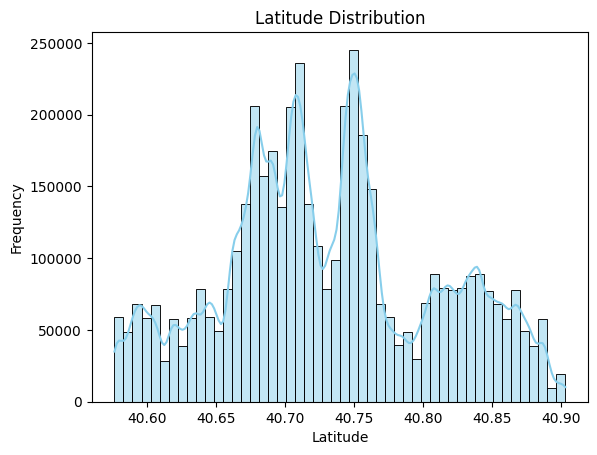

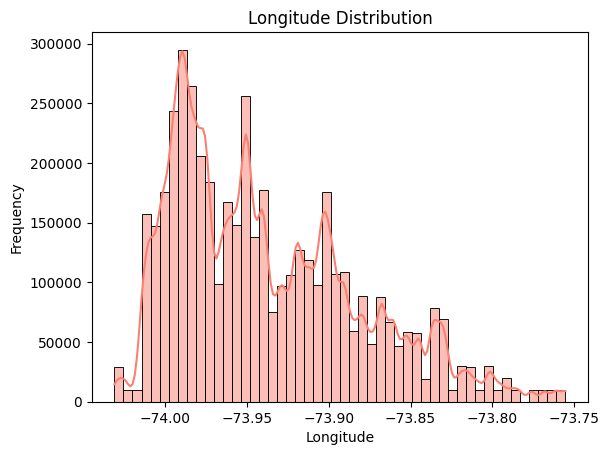

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Latitude distribution
sns.histplot(df['Latitude'], kde=True, bins=50, color='skyblue')
plt.title('Latitude Distribution')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.show()

# Longitude distribution
sns.histplot(df['Longitude'], kde=True, bins=50, color='salmon')
plt.title('Longitude Distribution')
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.show()


In [14]:
# Round to 3 or 4 decimal places to group "nearby" locations
df['latlon'] = list(zip(df['Latitude'].round(4), df['Longitude'].round(4)))

# Count frequency
location_counts = df['latlon'].value_counts().reset_index()
location_counts.columns = ['latlon', 'count']

# Top 10 frequent locations
print(location_counts.head(10))


                latlon  count
0  (40.7187, -74.0007)  39354
1   (40.752, -73.9774)  39170
2  (40.7556, -73.9871)  29579
3  (40.7353, -73.9906)  29507
4  (40.7573, -73.9897)  19819
5  (40.7523, -73.9934)  19817
6  (40.8407, -73.9396)  19817
7  (40.7133, -74.0092)  19816
8  (40.7683, -73.9817)  19816
9   (40.7625, -73.968)  19814


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(
    x=df['Longitude'], 
    y=df['Latitude'], 
    cmap="Reds", 
    fill=True, 
    thresh=0.05
)
plt.title("Density of Station Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [ ]:
# Round coordinates to group nearby stations
df['latlon'] = list(zip(df['Latitude'].round(4), df['Longitude'].round(4)))

# Count frequency
top_locations = df['latlon'].value_counts().head(10).reset_index()
top_locations.columns = ['latlon', 'count']
